In [2]:
from rocketpy import Environment, Rocket, HybridMotor, Flight, Fluid, CylindricalTank, MassFlowRateBasedTank, NoseCone, Tail
import yaml

In [8]:
with open("../dane_symulacji_rocketpy.yaml", 'r') as file:
    data = yaml.safe_load(file)

In [ ]:
Env = Environment(
    latitude=data["Env"]["latitude"], 
    longitude=data["Env"]["longitude"], 
    elevation=data["Env"]["elevation"], 
)

In [12]:
import datetime
date_obj = datetime.date.fromisoformat(data["Flight"]["flight_day"])

result = (date_obj.year, date_obj.month, date_obj.day, 12)


Env.set_date(result)


Gravity Details

Acceleration of gravity at surface level:    9.7957 m/s²
Acceleration of gravity at  80.000 km (ASL): 9.5554 m/s²


Launch Site Details

Launch Date: 2025-05-10 12:00:00 UTC
Launch Site Latitude: 35.34723°
Launch Site Longitude: -117.81006°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 426393.10 W    3911851.79 N
Launch Site UTM zone: 11S
Launch Site Surface Elevation: 624.0 m


Atmospheric Model Details

Atmospheric Model Type: standard_atmosphere
standard_atmosphere Maximum Height: 80.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 940.67 hPa
Surface Temperature: 284.10 K
Surface Air Density: 1.153 kg/m³
Surface Speed of Sound: 337.73 m/s


Earth Model Details

Earth Radius at Launch site: 6371.02 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034



Gravity Model Plots


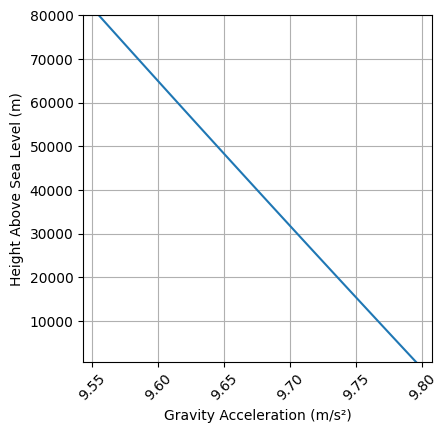



Atmospheric Model Plots


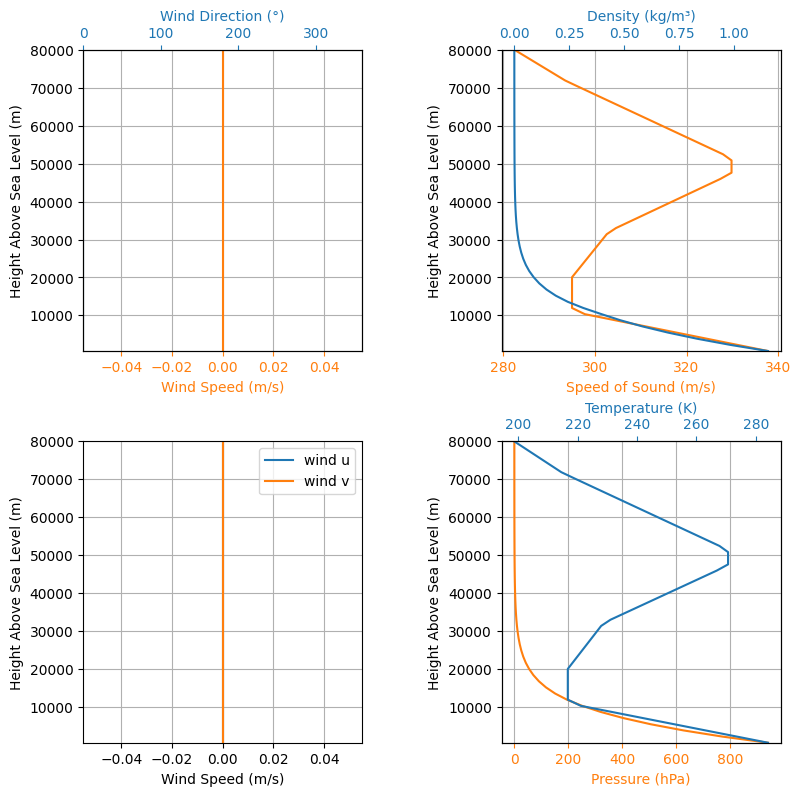

In [18]:
Env.set_atmospheric_model(type="standard_atmosphere")

Env.all_info()

In [19]:
# Define the fluids
oxidizer_liq=Fluid(name="nitrous oxide", density=790)
oxidizer_gas = Fluid(name="nitrous oxide", density=180)

# Define tank geometry
tank_shape = CylindricalTank(0.087, 0.700)

# Define tank
oxidizer_tank = MassFlowRateBasedTank(
    name="oxidizer_tank_r7",
    geometry=tank_shape,
    flux_time=4.9,
    initial_liquid_mass=9.87,
    initial_gas_mass=0.13,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=2,
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=oxidizer_liq,
    gas=oxidizer_gas,
)

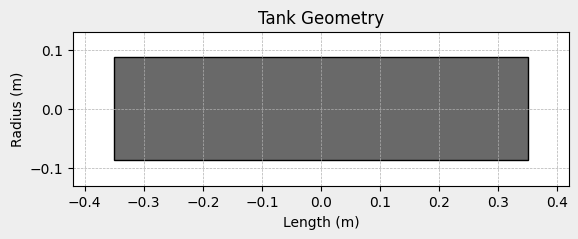

In [20]:
#Draw the tank
oxidizer_tank.draw()

In [21]:
oxidizer_tank.flux_time #returns the start and final times of the tank flux

(0, 4.9)

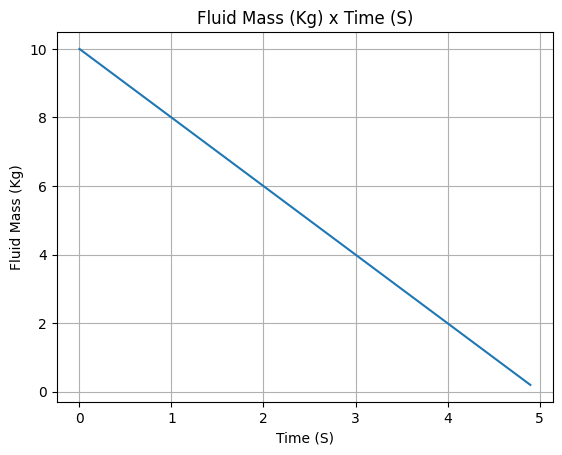

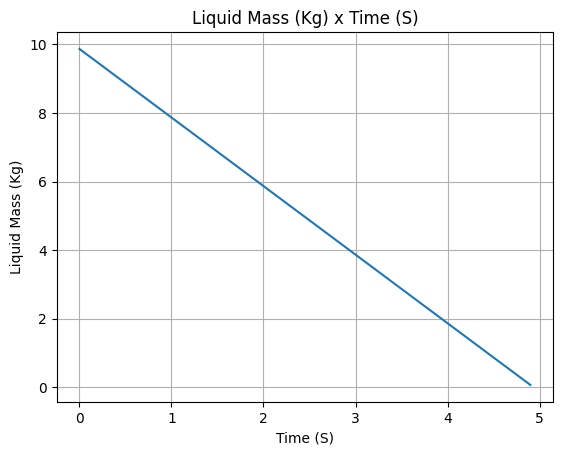

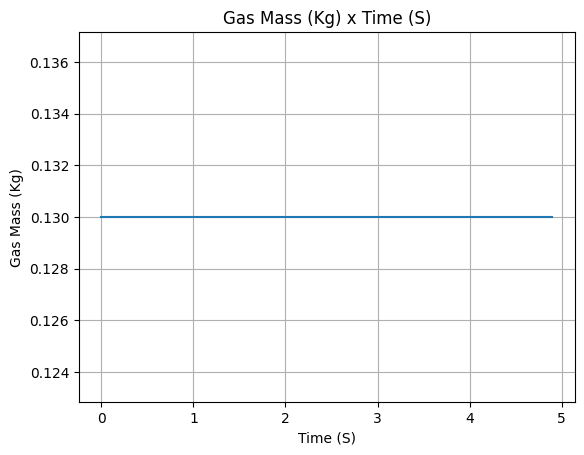

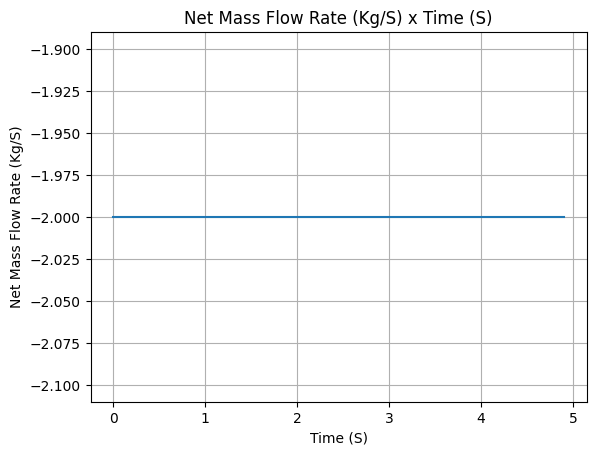

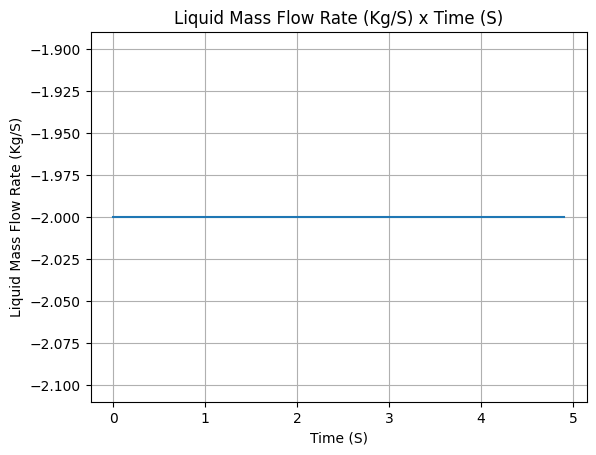

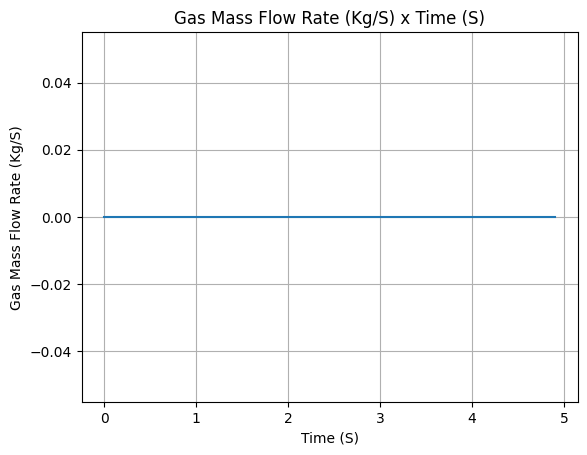

In [22]:
#Evolution of the Propellant Mass and 
oxidizer_tank.fluid_mass.plot()
#mass of the liquid as a function of time
oxidizer_tank.liquid_mass.plot()
#mass of the gas as a function of time
oxidizer_tank.gas_mass.plot()
#the Mass, liquid and gas flow rate
oxidizer_tank.net_mass_flow_rate.plot()
oxidizer_tank.net_liquid_flow_rate.plot()
oxidizer_tank.net_gas_flow_rate.plot()

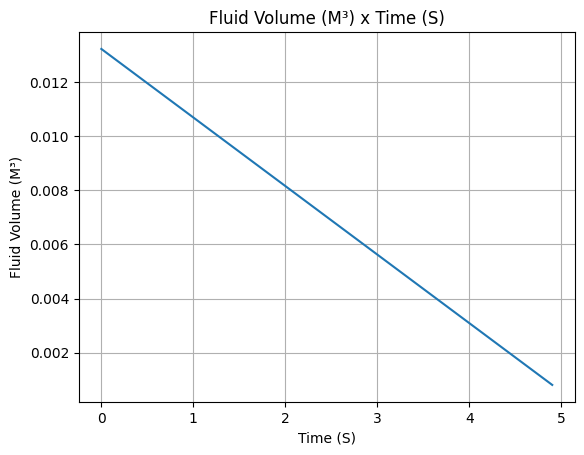

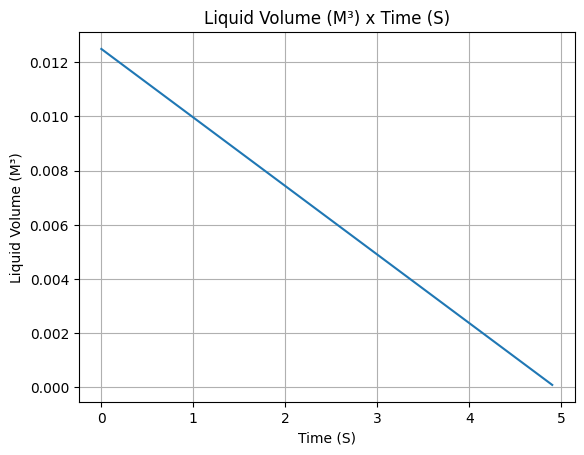

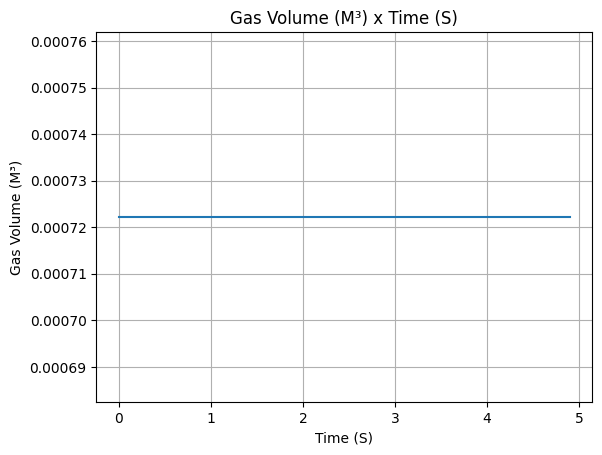

In [23]:
#total fluid volume inside the tank as a function of time(sum of the liquid and gas volumes)
oxidizer_tank.fluid_volume.plot()
#the volume of the liquid as a function of time
oxidizer_tank.liquid_volume.plot()
#the volume of the gas as a function of time
oxidizer_tank.gas_volume.plot()


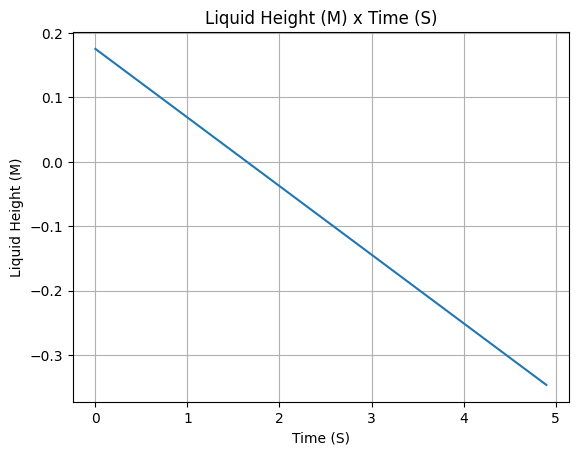

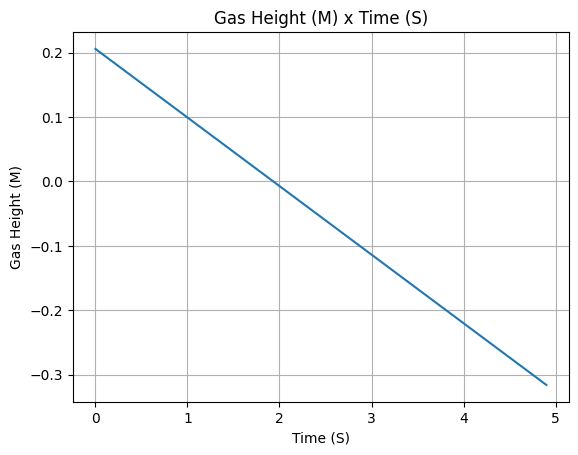

In [24]:
#liquid level as a function of time
oxidizer_tank.liquid_height.plot()

#gas level as a function of time
oxidizer_tank.gas_height.plot()

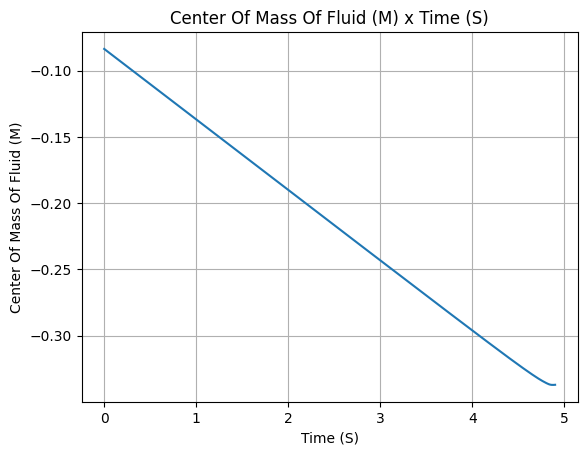

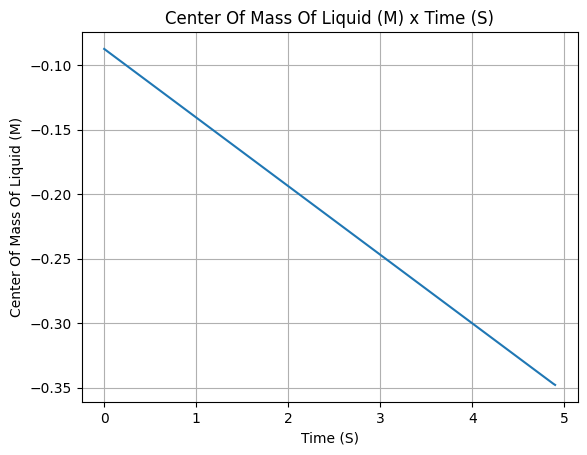

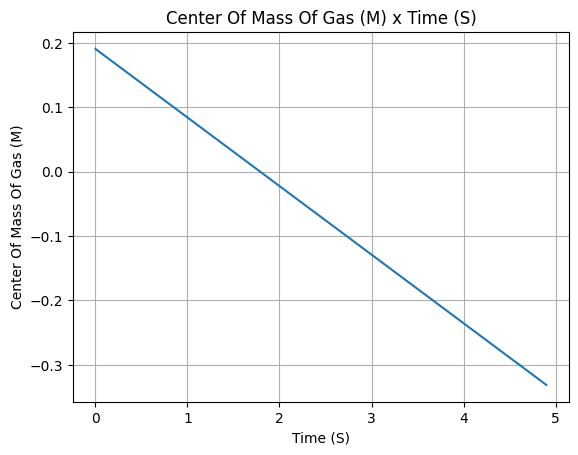

In [25]:
# Evolution of the Propellant center of mass position
oxidizer_tank.center_of_mass.plot()

oxidizer_tank.liquid_center_of_mass.plot()

oxidizer_tank.gas_center_of_mass.plot()

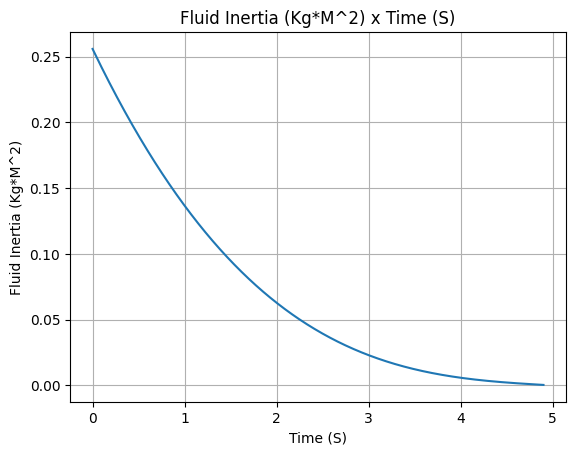

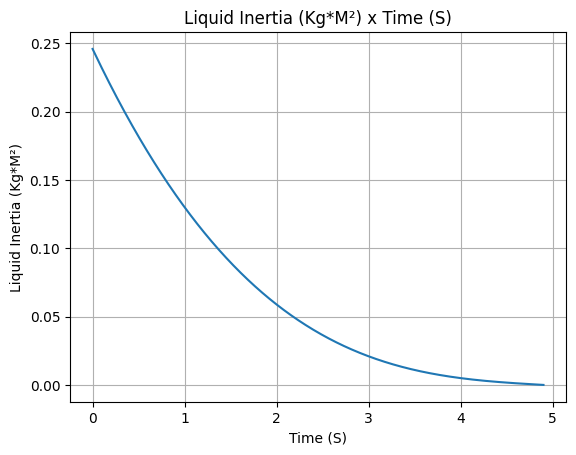

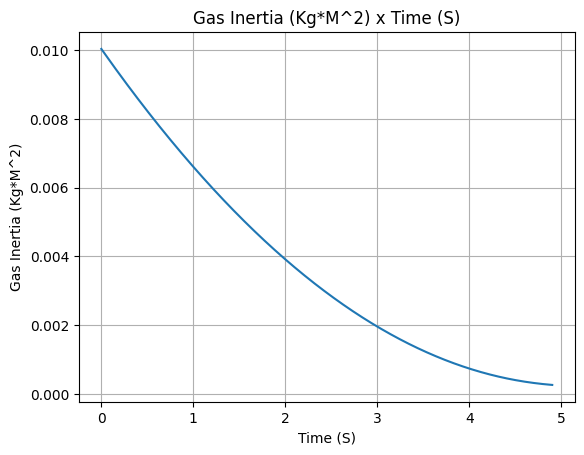

In [26]:
oxidizer_tank.inertia.plot()

oxidizer_tank.liquid_inertia.plot()

oxidizer_tank.gas_inertia.plot()

In [ ]:
hybrid_motor = HybridMotor(
    thrust_source="SimLE_SimBa_R7_Rocket.eng",
    dry_mass=12.5,
    dry_inertia=data["Motor"]["dry_inertia"]
    center_of_dry_mass_position=0.58,
    burn_time=9,
    grain_number=1,
    grain_separation=0,
    grain_outer_radius=0.063,
    grain_initial_inner_radius=0.035,
    grain_initial_height=0.5,
    grain_density=947,
    nozzle_radius=0.0385,
    throat_radius=0.0185,
    grains_center_of_mass_position=0.5,
    coordinate_system_orientation="nozzle_to_combustion_chamber"
)

In [29]:
hybrid_motor.add_tank(
    tank=oxidizer_tank, position=1.42
)

Nozzle Details
Outlet Radius: 0.0385 m
Throat Radius: 0.0185 m
Outlet Area: 0.004657 m²
Throat Area: 0.001075 m²
Position: 0 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 947 kg/m3
Grain Outer Radius: 0.063 m
Grain Inner Radius: 0.035 m
Grain Height: 0.5 m
Grain Volume: 0.004 m3
Grain Mass: 4.082 kg

Motor Details
Total Burning Time: 9 s
Total Propellant Mass: 14.082 kg
Structural Mass Ratio: 0.470
Average Propellant Exhaust Velocity: 1447.277 m/s
Average Thrust: 2264.477 N
Maximum Thrust: 3675.248 N at 0.048 s after ignition.
Total Impulse: 20380.293 Ns



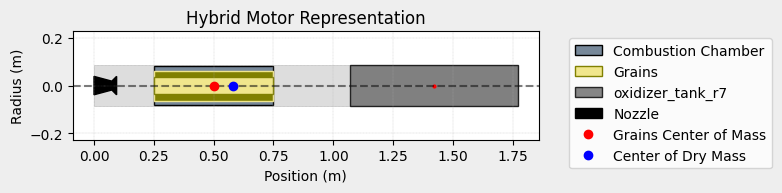

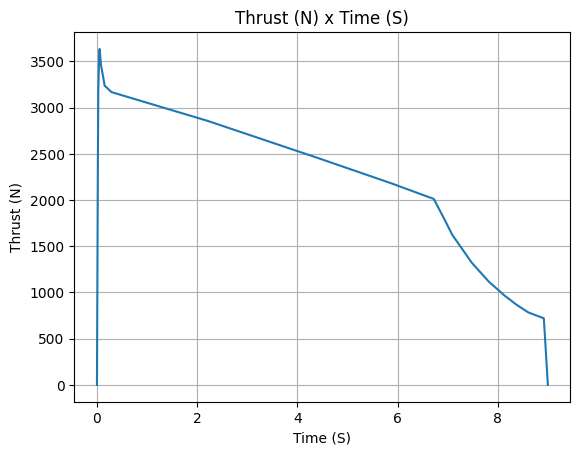

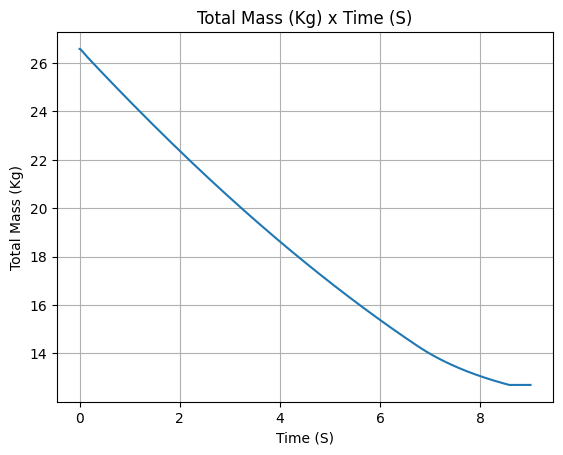

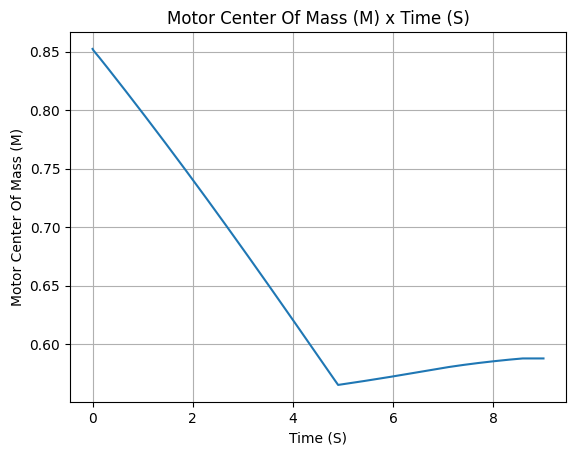

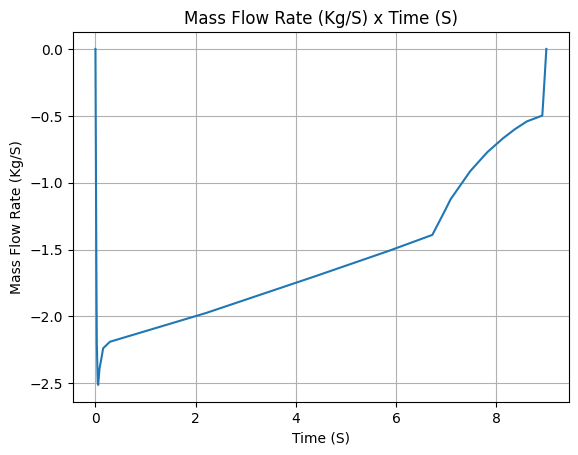

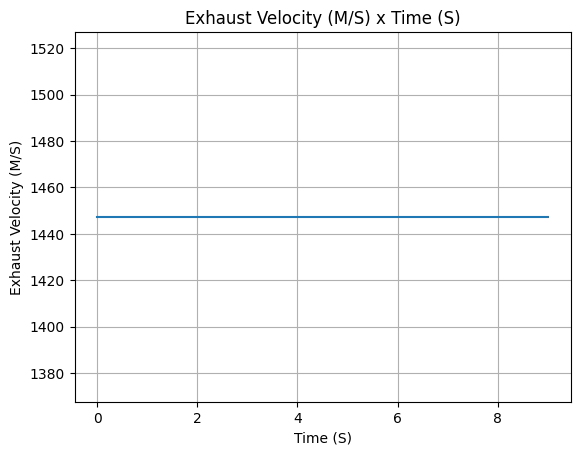

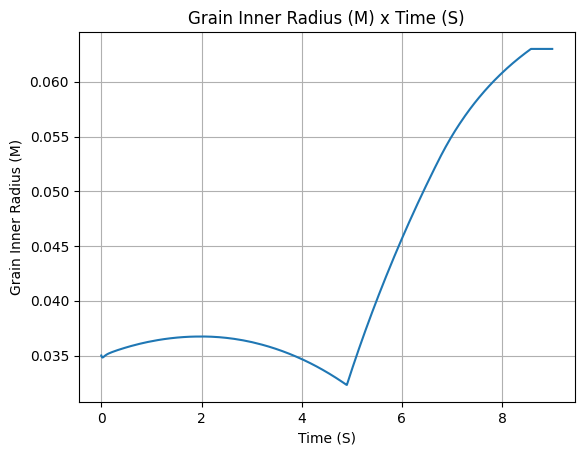

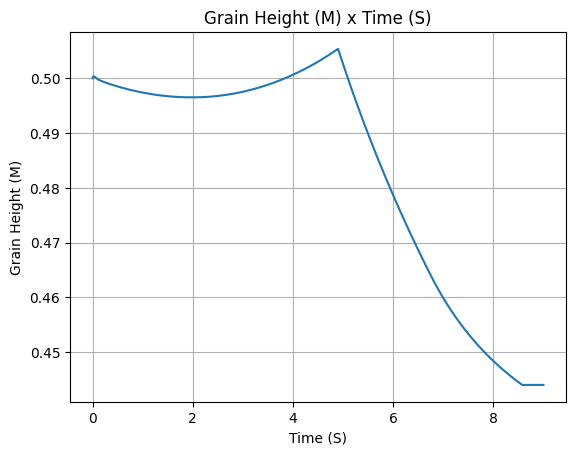

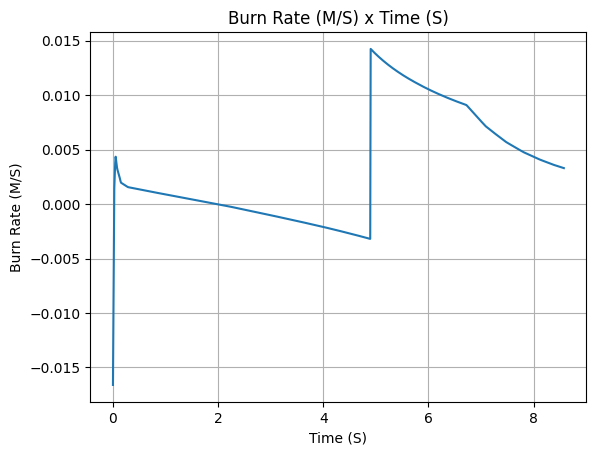

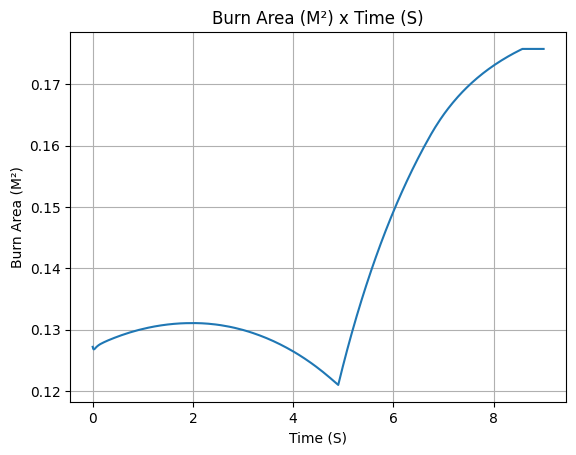

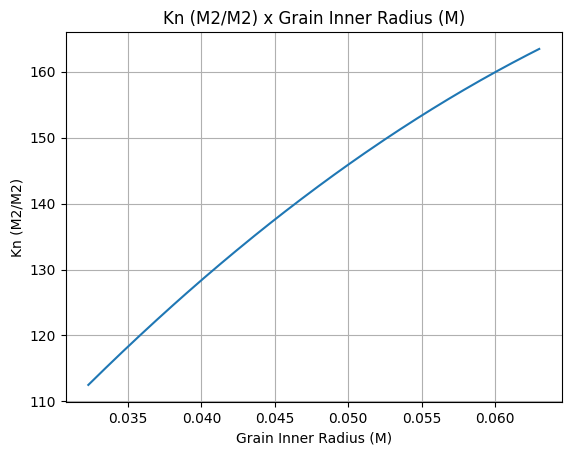

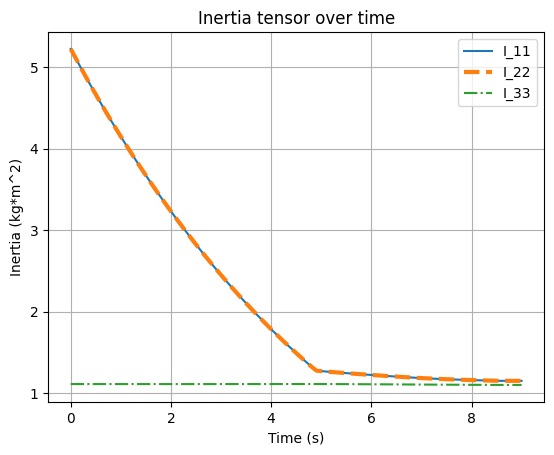

In [30]:
hybrid_motor.all_info()

In [32]:
R7 = Rocket(
    radius=0.087,
    mass=25,
    inertia=(0,0,0),
    power_off_drag="powerOffDragCurve.csv",
    power_on_drag="powerOnDragCurve.csv",
    center_of_mass_without_motor=1.94828,
    coordinate_system_orientation="tail_to_nose"
)

In [33]:
R7.add_motor(hybrid_motor, position=0)

In [34]:
buttons = R7.set_rail_buttons(
    upper_button_position=1.91455,
    lower_button_position=0.94021,
    angular_position=10,
)

buttons.all_info()


Identification of the AeroSurface:
----------------------------------
Name: Rail Buttons
Python Class: <class 'rocketpy.rocket.aero_surface.rail_buttons.RailButtons'>

Geometric information of the RailButtons:
-----------------------------------------
Distance from one button to the other: 0.974 m
Angular position of the buttons: 10.000 deg

Lift information of the AeroSurface:
-----------------------------------
Center of Pressure position in local coordinates: (0.000, 0.000, 0.000)
Lift coefficient derivative at Mach 0 and AoA 0: 0.000 1/rad



Identification of the AeroSurface:
----------------------------------
Name: Nose Cone
Python Class: <class 'rocketpy.rocket.aero_surface.nose_cone.NoseCone'>

Geometric information of NoseCone:
----------------------------------
Length: 0.750 m
Kind: powerseries
Base radius: 0.087 m
Reference rocket radius: 0.087 m
Reference radius ratio: 1.000

Lift information of the AeroSurface:
-----------------------------------
Center of Pressure position in local coordinates: (0.000, 0.000, 0.462)
Lift coefficient derivative at Mach 0 and AoA 0: 2.000 1/rad



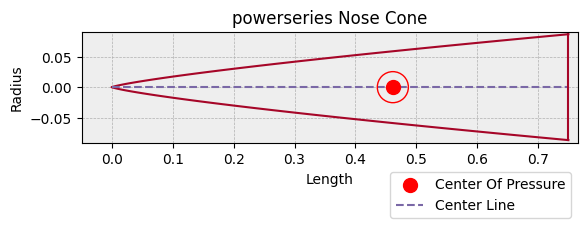

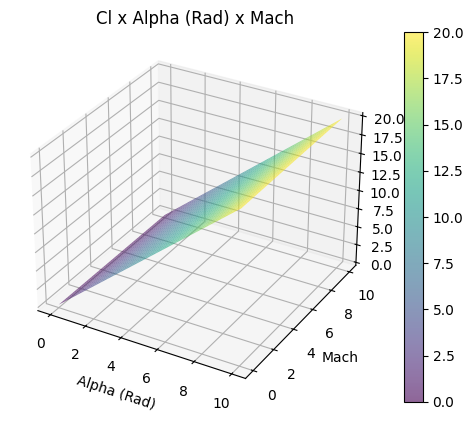

In [35]:
nose=R7.add_nose(
    length=0.750,
    kind="powerseries",
    bluffness=None,
    power=0.8,
    position=3.917)

nose.all_info()


Identification of the AeroSurface:
----------------------------------
Name: Tail
Python Class: <class 'rocketpy.rocket.aero_surface.tail.Tail'>

Geometric information of the Tail:
----------------------------------
Top radius: 0.087 m
Bottom radius: 0.072 m
Reference radius: 0.174 m
Length: 0.095 m
Slant length: 0.096 m
Surface area: 0.048042 m²

Lift information of the AeroSurface:
-----------------------------------
Center of Pressure position in local coordinates: (0.000, 0.000, 0.046)
Lift coefficient derivative at Mach 0 and AoA 0: -0.630 1/rad



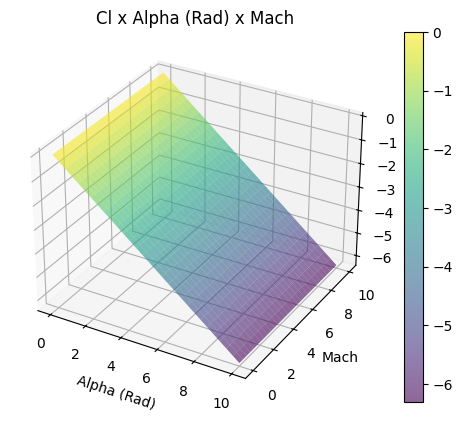

In [36]:
tail=R7.add_tail(
    top_radius=0.087,
    bottom_radius=0.072,
    length=0.095,
    position=0.095,
    
)

#tail.slant_length=0.0835
#tail.surface_area=0.0478365

tail.all_info()



Identification of the AeroSurface:
----------------------------------
Name: Fins
Python Class: <class 'rocketpy.rocket.aero_surface.fins.trapezoidal_fins.TrapezoidalFins'>

Geometric information of the fin set:
-------------------------------------
Number of fins: 4
Reference rocket radius: 0.087 m
Tip chord: 0.136 m
Root chord: 0.204 m
Span: 0.102 m
Cant angle: 0.000 ° or 0.000 rad
Longitudinal section area: 0.017 m²
Aspect ratio: 1.195 
Gamma_c: 0.000 m
Mean aerodynamic chord: 0.047 m

Roll information of the fin set:
--------------------------------
Geometric constant: 0.000 m
Damping interference factor: 1.314 rad
Forcing interference factor: 0.937 rad

Lift information of the fin set:
--------------------------------
Lift interference factor: 1.461 m
Center of Pressure position in local coordinates: (0.000, 0.000, 0.059)
Lift Coefficient derivative (single fin) at Mach 0 and AoA 0: 1.260
Lift Coefficient derivative (fin set) at Mach 0 and AoA 0: 3.682


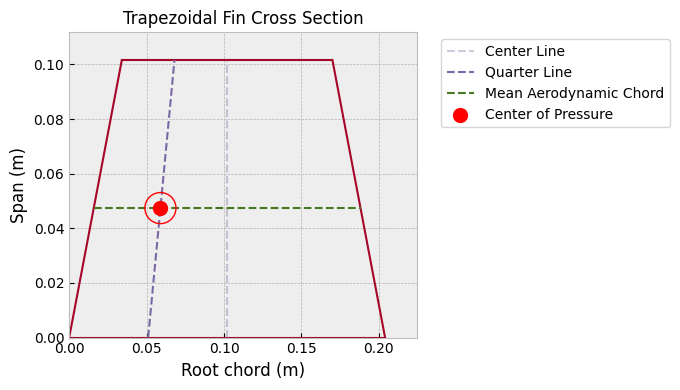

Roll parameters:


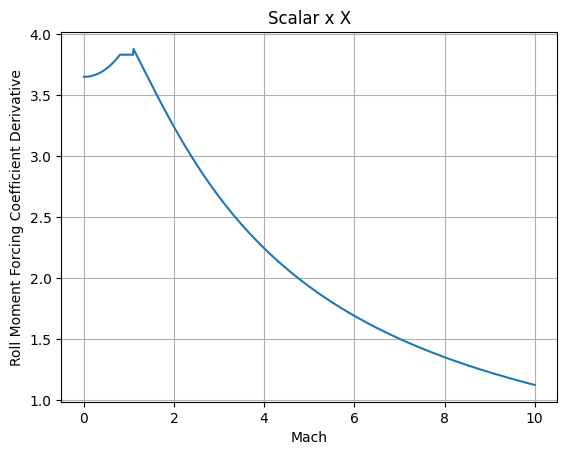

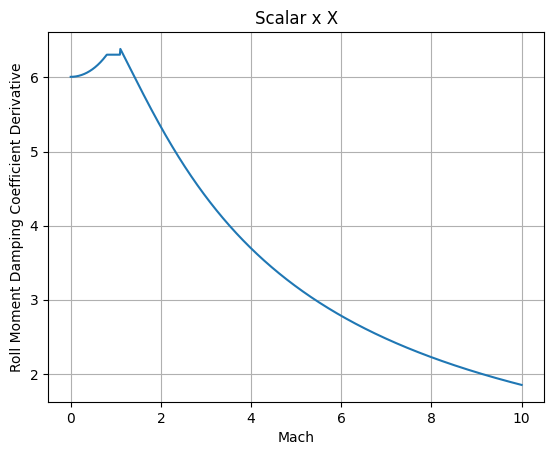

Lift coefficient:


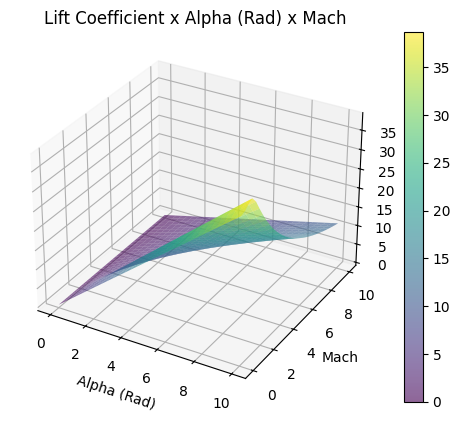

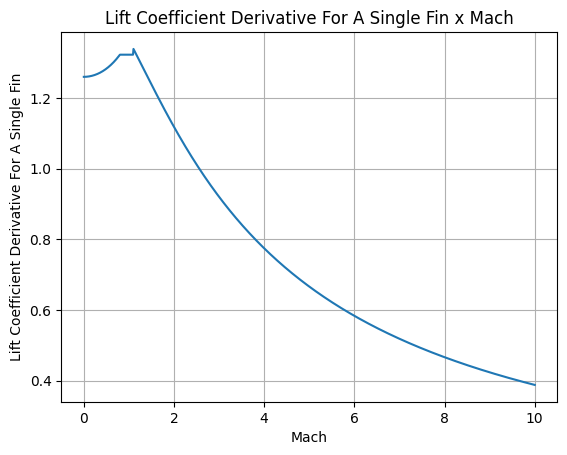

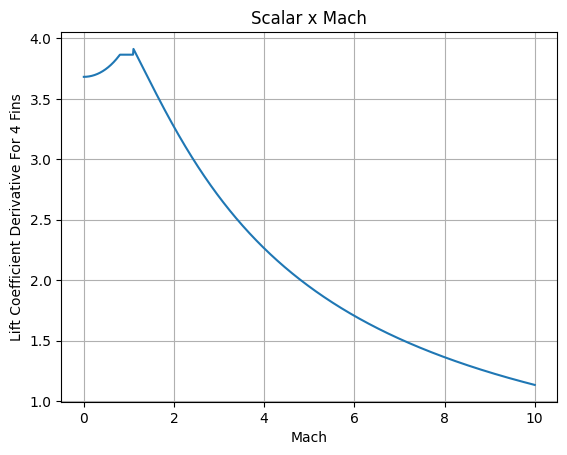

In [37]:
fins = R7.add_trapezoidal_fins(
    n=4,
    root_chord=0.204,
    tip_chord=0.136,
    span=0.1016,
    sweep_length=0.034,
    cant_angle=0,
    position=0.353,
)

fins.all_info()

In [38]:
main = R7.add_parachute(
    name="main",
    cd_s=10.706,
    trigger=550,
    sampling_rate=100,
    lag=3,
    noise=(0, 0, 0),
)

drogue = R7.add_parachute(
    name="drogue",
    cd_s= 1.43,
    trigger="apogee",
    sampling_rate=100,
    lag=3,
    noise=(0, 0, 0),
)

main.all_info()
drogue.all_info()



Parachute Details

Parachute Main with a cd_s of 10.7060 m2
Ejection signal trigger: 550 m (AGL)
Ejection system refresh rate: 100.000 Hz
Time between ejection signal is triggered and the parachute is fully opened: 3.0 s


Parachute Details

Parachute Drogue with a cd_s of 1.4300 m2
Ejection signal trigger: At Apogee
Ejection system refresh rate: 100.000 Hz
Time between ejection signal is triggered and the parachute is fully opened: 3.0 s




Inertia Details

Rocket Mass: 25.000 kg (without motor)
Rocket Dry Mass: 37.500 kg (with unloaded motor)
Rocket Loaded Mass: 51.582 kg
Rocket Structural Mass Ratio: 0.727
Rocket Inertia (with unloaded motor) 11: 16.702 kg*m2
Rocket Inertia (with unloaded motor) 22: 15.642 kg*m2
Rocket Inertia (with unloaded motor) 33: 1.100 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.087 m
Rocket Frontal Area: 0.023779 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.456 m
Rocket Center of Dry Mass - Nozzle Exit: 1.492 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.398 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.109 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Tail Lift Coefficient Derivative: -0.630/rad
Fins Lift Coefficient 

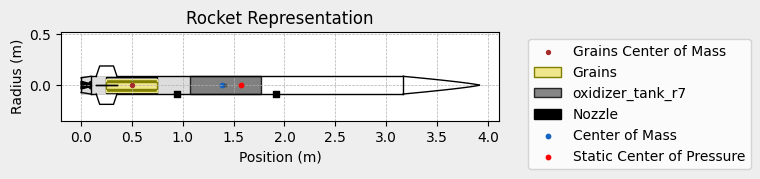


Mass Plots
----------------------------------------


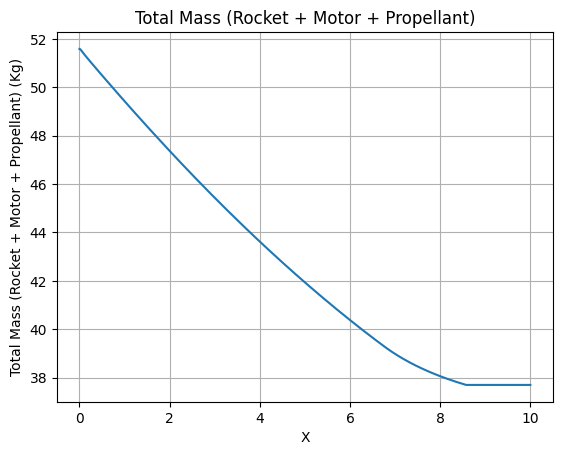

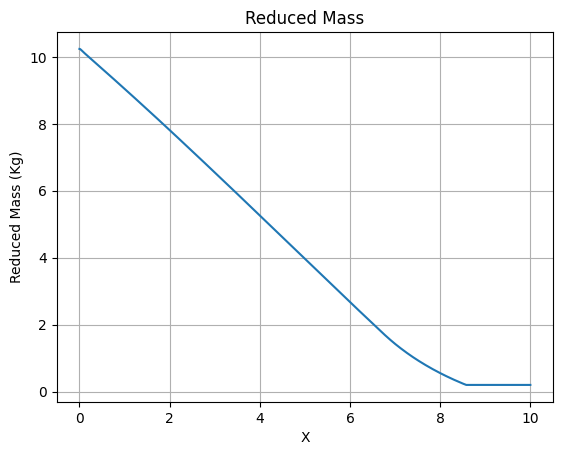


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


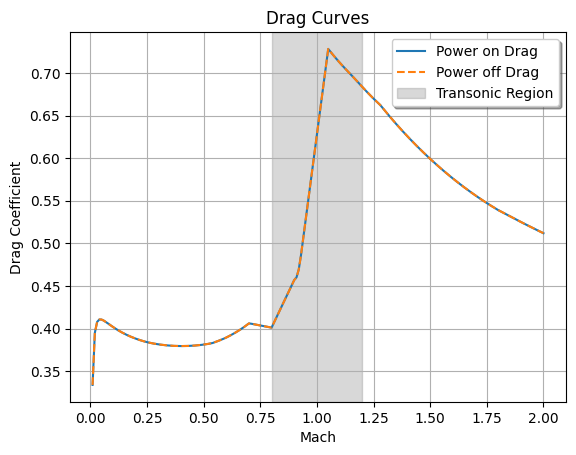


Stability Plots
--------------------


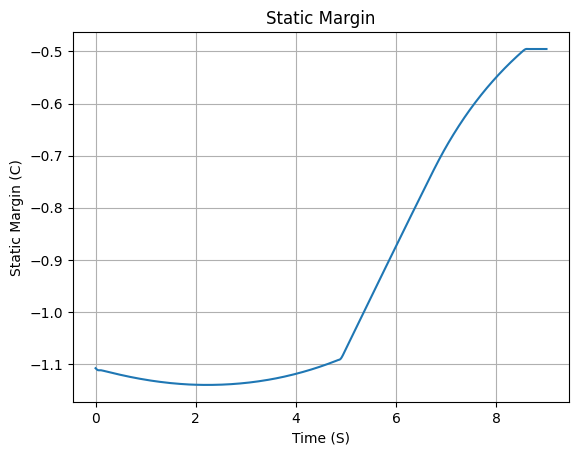

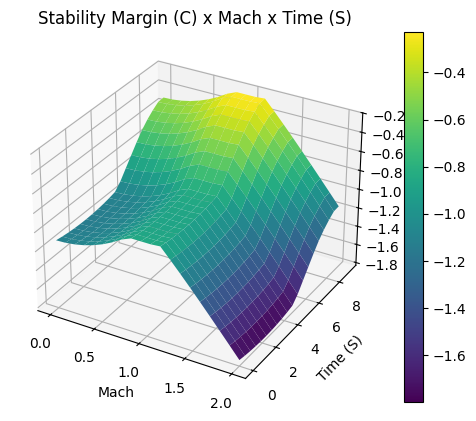


Thrust-to-Weight Plot
----------------------------------------


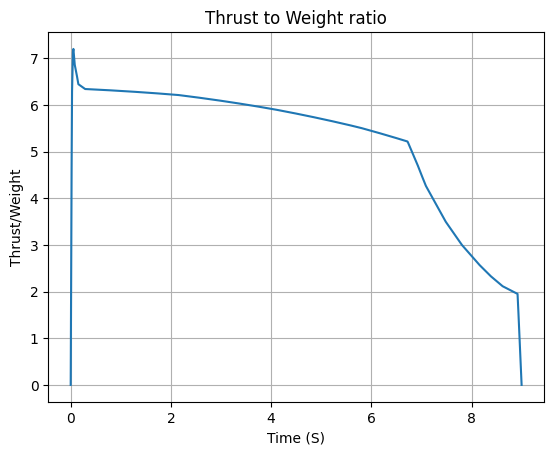

In [39]:
R7.all_info()

In [41]:
test_flight = Flight(
  rocket=R7, environment=Env, rail_length=8,
)

capi_return is NULL
Call-back cb_f_in_lsoda__user__routines failed.


KeyboardInterrupt: 


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 624.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.763 | e1: -0.056 | e2: 0.067 | e3: -0.640
Euler Angles - Spin φ : 10.00° | Nutation θ: -10.00° | Precession ψ: -90.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: -0.648 c


Surface Wind Conditions

Frontal Surface Wind Speed: 0.00 m/s
Lateral Surface Wind Speed: 0.00 m/s


Launch Rail

Launch Rail Length: 8 m
Launch Rail Inclination: 80.00°
Launch Rail Heading: 90.00°


Rail Departure State

Rail Departure Time: 0.486 s
Rail Departure Velocity: 25.372 m/s
Rail Departure Stability Margin: -0.659 c
Rail Departure Angle of Attack: 0.000°
Rail Departure Thrust-Weight Ratio: 6.330
Rail Departure Reynolds Number: 2.878e+05


Burn out State

Burn out time: 9.000 s
Altitude at burn out: 2375.672 m (ASL) | 1751.672 m (AGL)
Rocket speed at burn out: 311.640 m/s
Freestream v

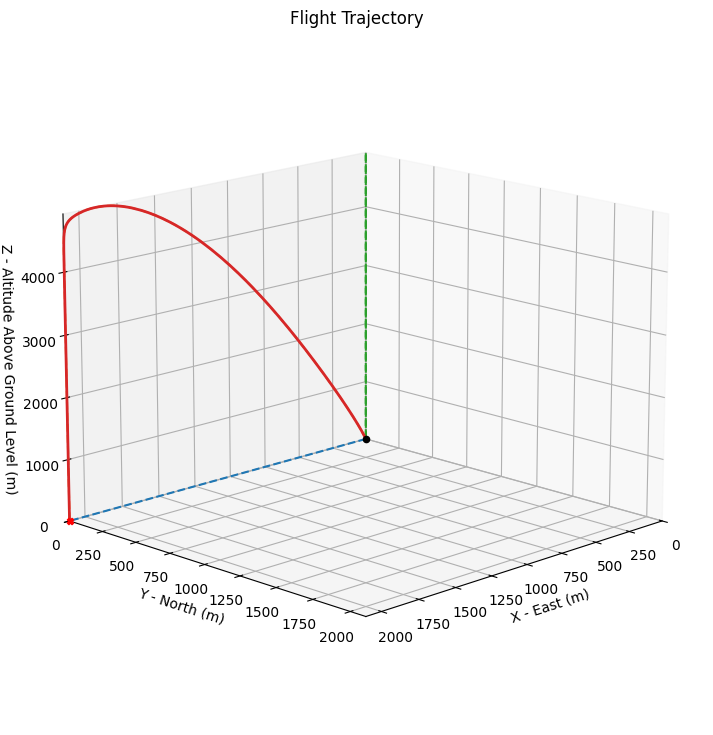



Trajectory Kinematic Plots



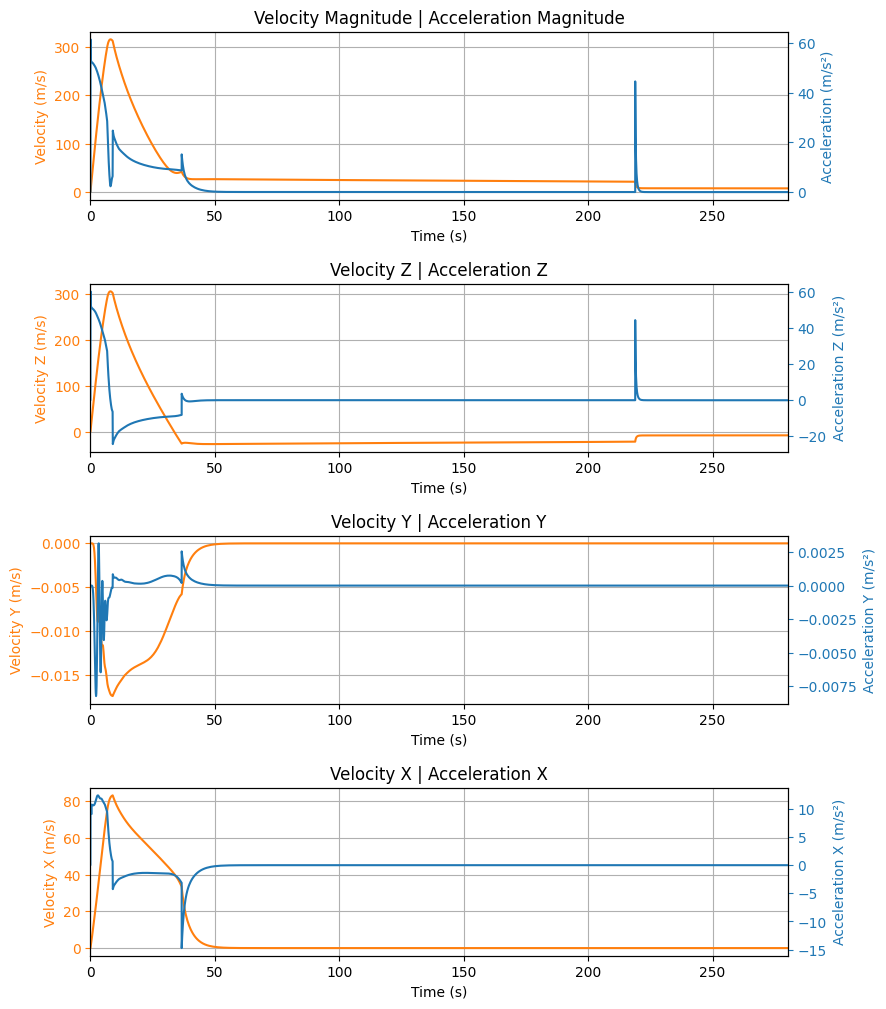



Angular Position Plots



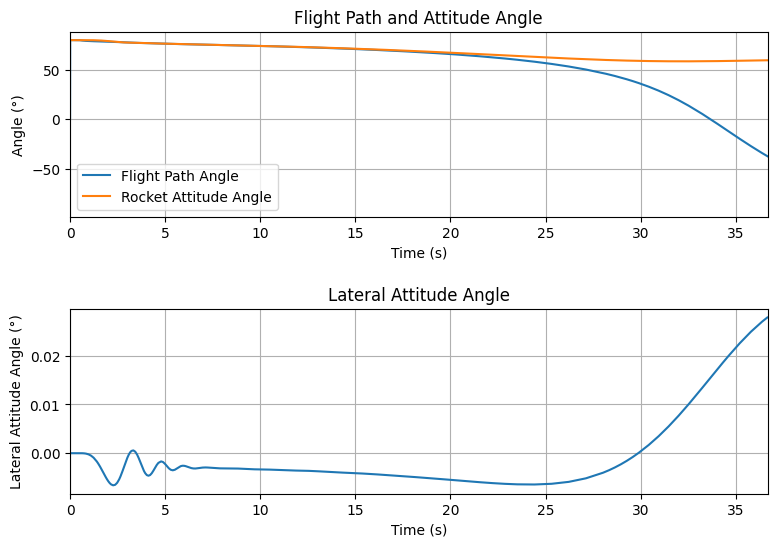



Path, Attitude and Lateral Attitude Angle plots



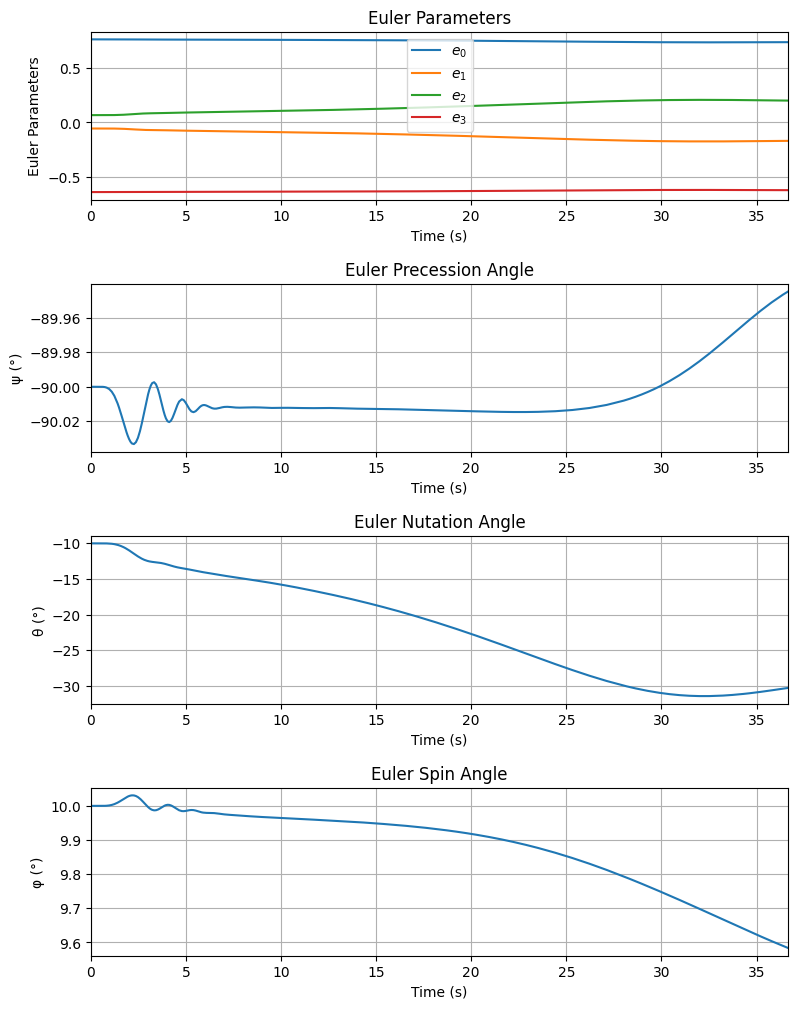



Trajectory Angular Velocity and Acceleration Plots



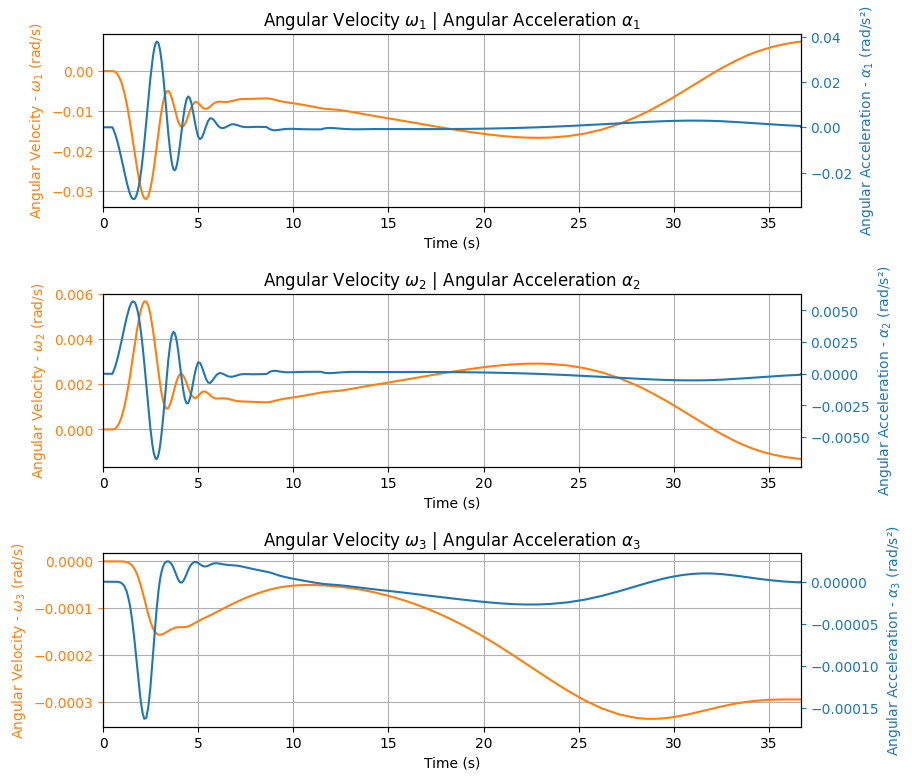



Aerodynamic Forces Plots



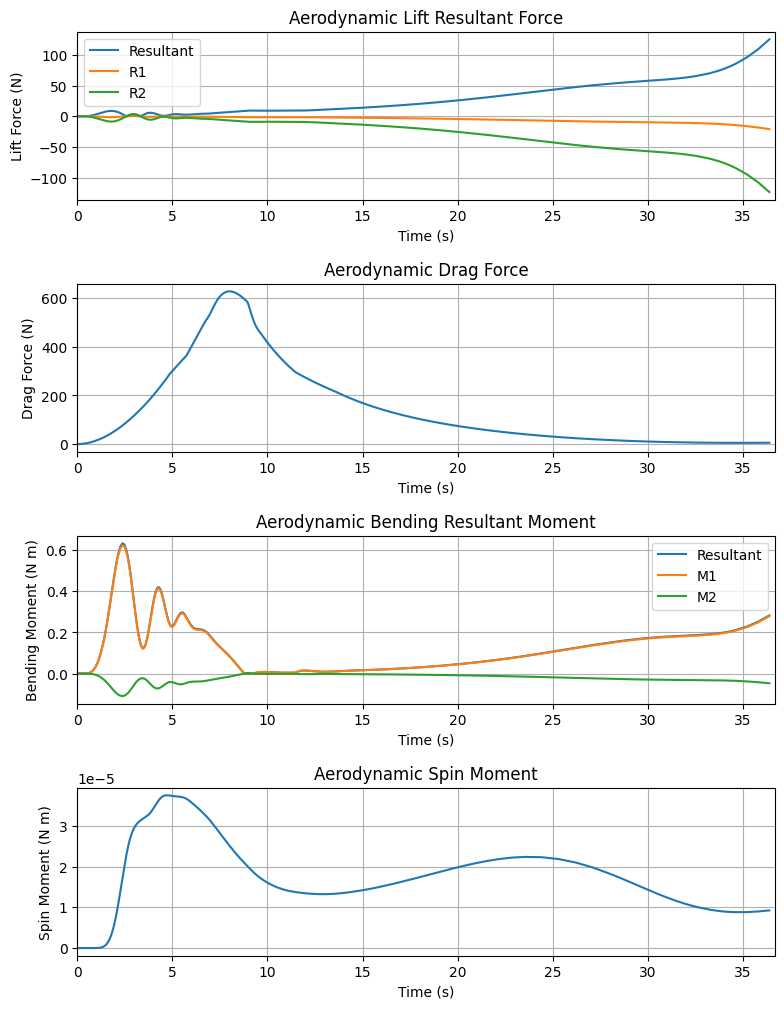



Rail Buttons Forces Plots



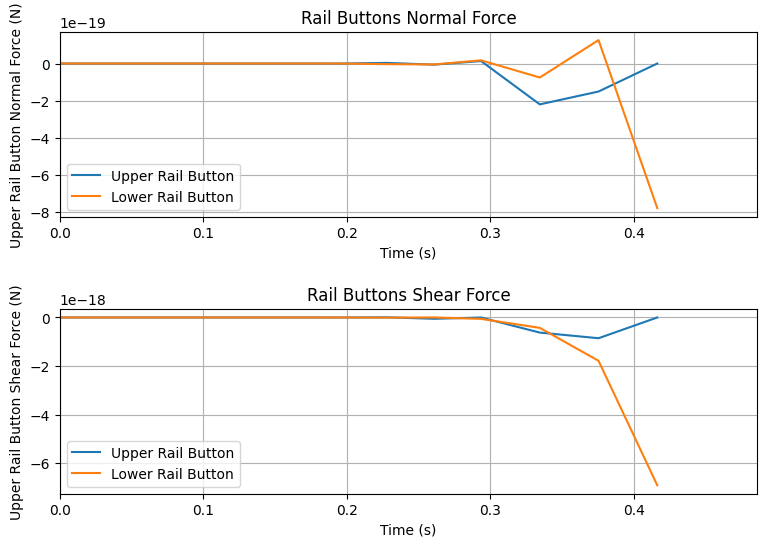



Trajectory Energy Plots



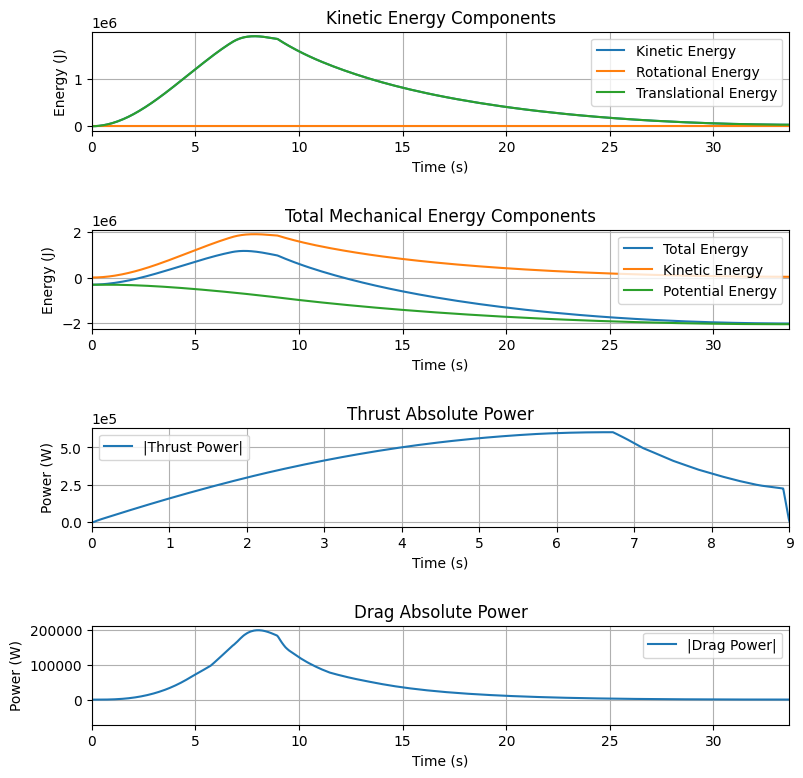



Trajectory Fluid Mechanics Plots



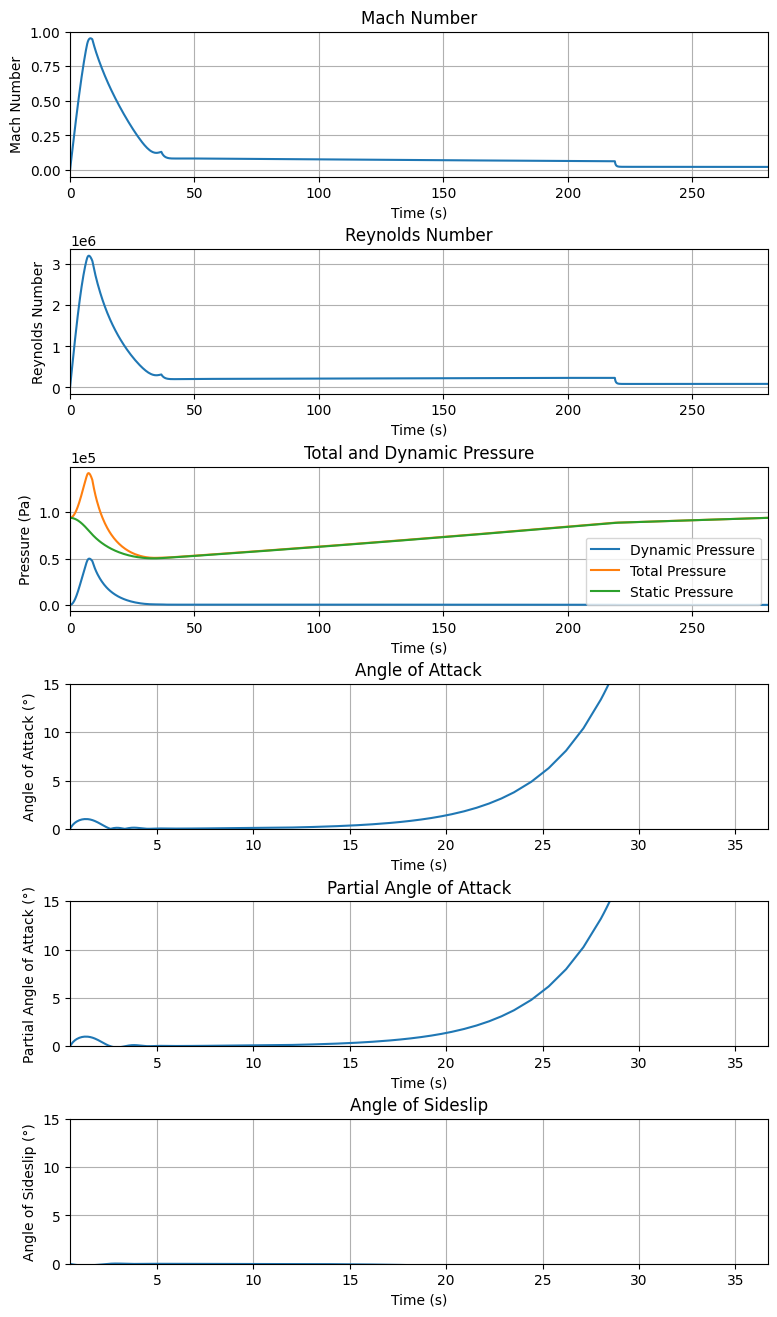



Trajectory Stability and Control Plots



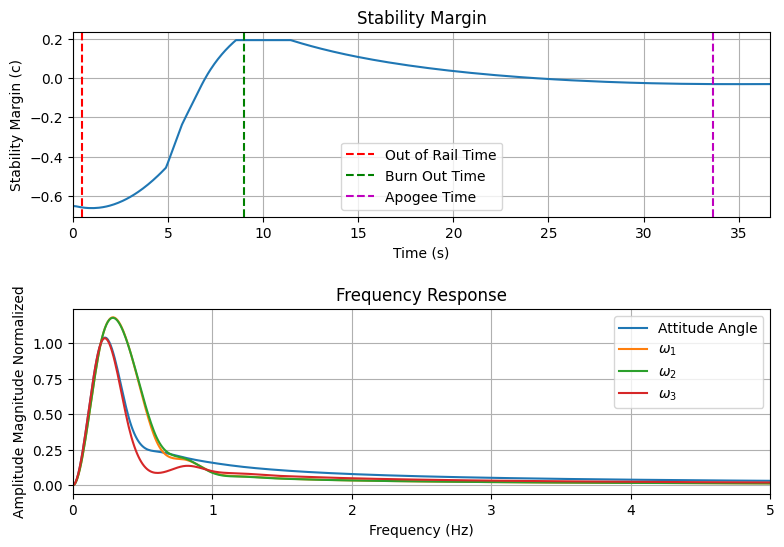



Rocket and Parachute Pressure Plots



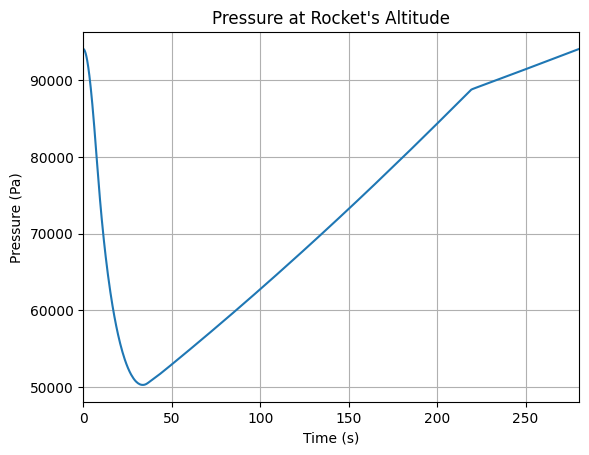


Parachute:  main


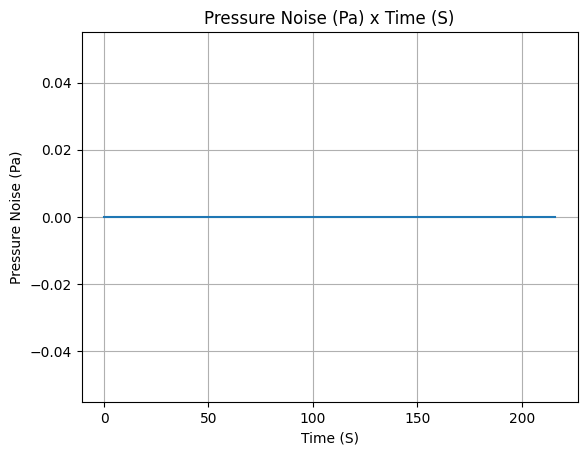

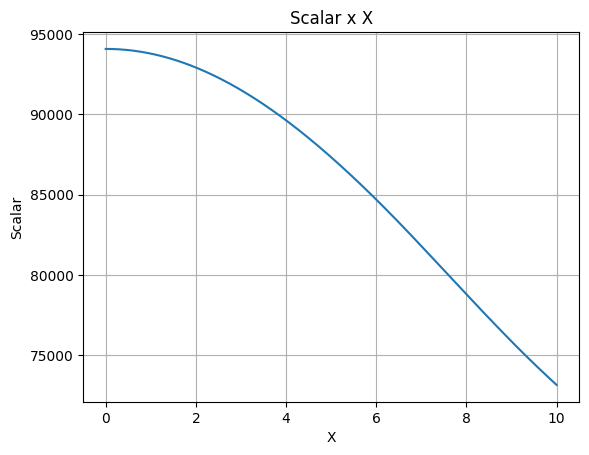

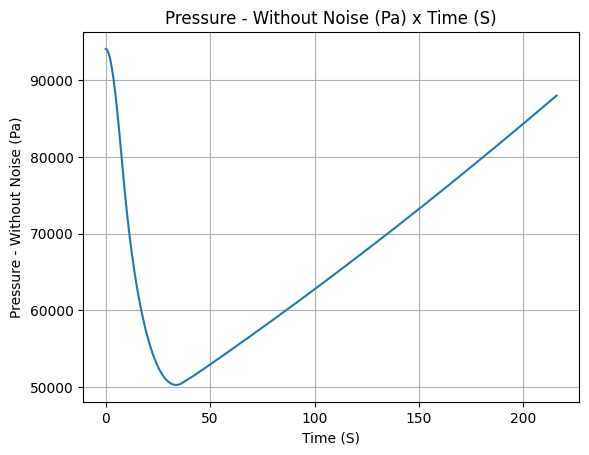


Parachute:  drogue


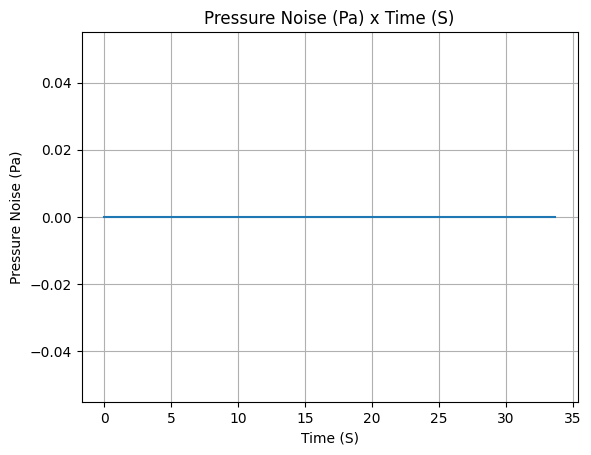

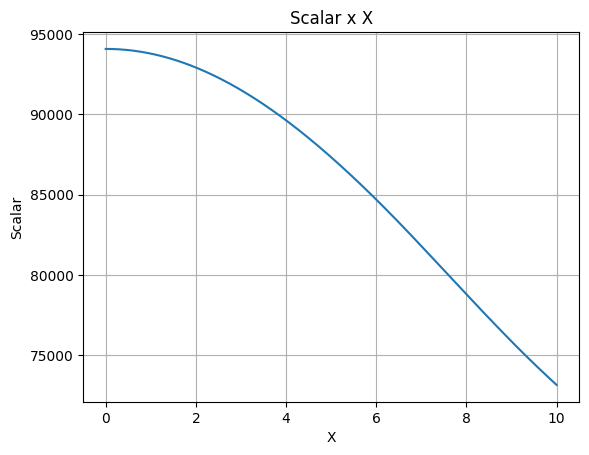

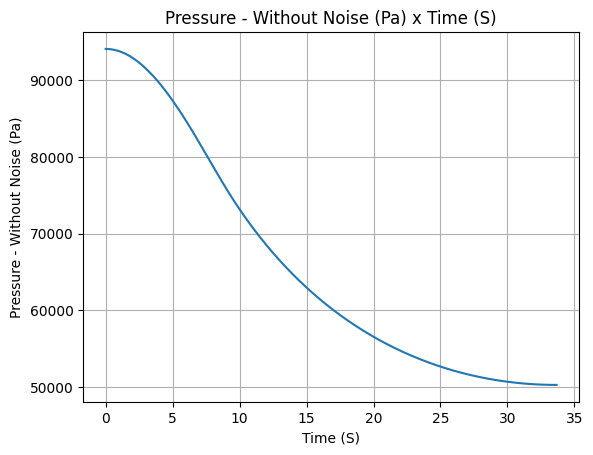

In [ ]:
test_flight.all_info()